In [1]:
%pip install --upgrade anomalytics
%pip list

In [2]:
import anomalytics as atics

<h1 align=center><strong>Example - Anomaly Detection with POT Method</strong></h1>

The dataset used here is downloaded from [pyextremes](https://georgebv.github.io/pyextremes/quickstart/). The data is based on water level data for ["The Battery" station](https://tidesandcurrents.noaa.gov/waterlevels.html?id=8518750) located in New York, as stated in the webpage.

Now, we are going to analyse this dataset as an example project for using `anomalytics`.

<h1 align=center><strong>Extremely Large Anomaly Detection</strong></h1>

# **The Data**

In the current release `v0.1.0`,  I decided to start analysing Time Series which is a `pandas.Series` object since to analysie `pandas.DataFrame`, we can easily decoouple each feature and run a single analysis. Hence as the first step, let#s upload the data with the built-in wrapper function from `anomalyitcs`.

In [3]:
ts = atics.read_ts(
    path_to_file="../assets/battery_wl.csv",
    file_type="csv",
    names=["Water Level"]
)

ts.head()

2008-11-03 06:00:00    0.219
2008-11-03 07:00:00   -0.041
2008-11-03 08:00:00   -0.282
2008-11-03 09:00:00   -0.368
2008-11-03 10:00:00   -0.400
Name: Water Level, dtype: float64

# **The EDA**

In [4]:
ts.describe()

count    100002.000000
mean          0.029332
std           0.546171
min          -1.856000
25%          -0.423000
50%           0.035000
75%           0.483000
max           3.417000
Name: Water Level, dtype: float64

In [5]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 100002 entries, 2008-11-03 06:00:00 to 2020-03-31 23:00:00
Series name: Water Level
Non-Null Count   Dtype  
--------------   -----  
100002 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


# **The Detector**

To analyse this data, we are going to apply Peaks Over Threshold method to extract the exceedances and fit it to Generalized Pareto Distribution so we can calculate the anomaly score which is basically just. The idea is to have every statistical method and create a model out of it so we can choose based on the use case. Currently, I  have just implemented the POT Method. Hence the `POT Detector` 😎

In [6]:
pot_detector = atics.get_detector(
    method="POT",
    dataset=ts,
    anomaly_type="high"
)
str(pot_detector)

'POT'

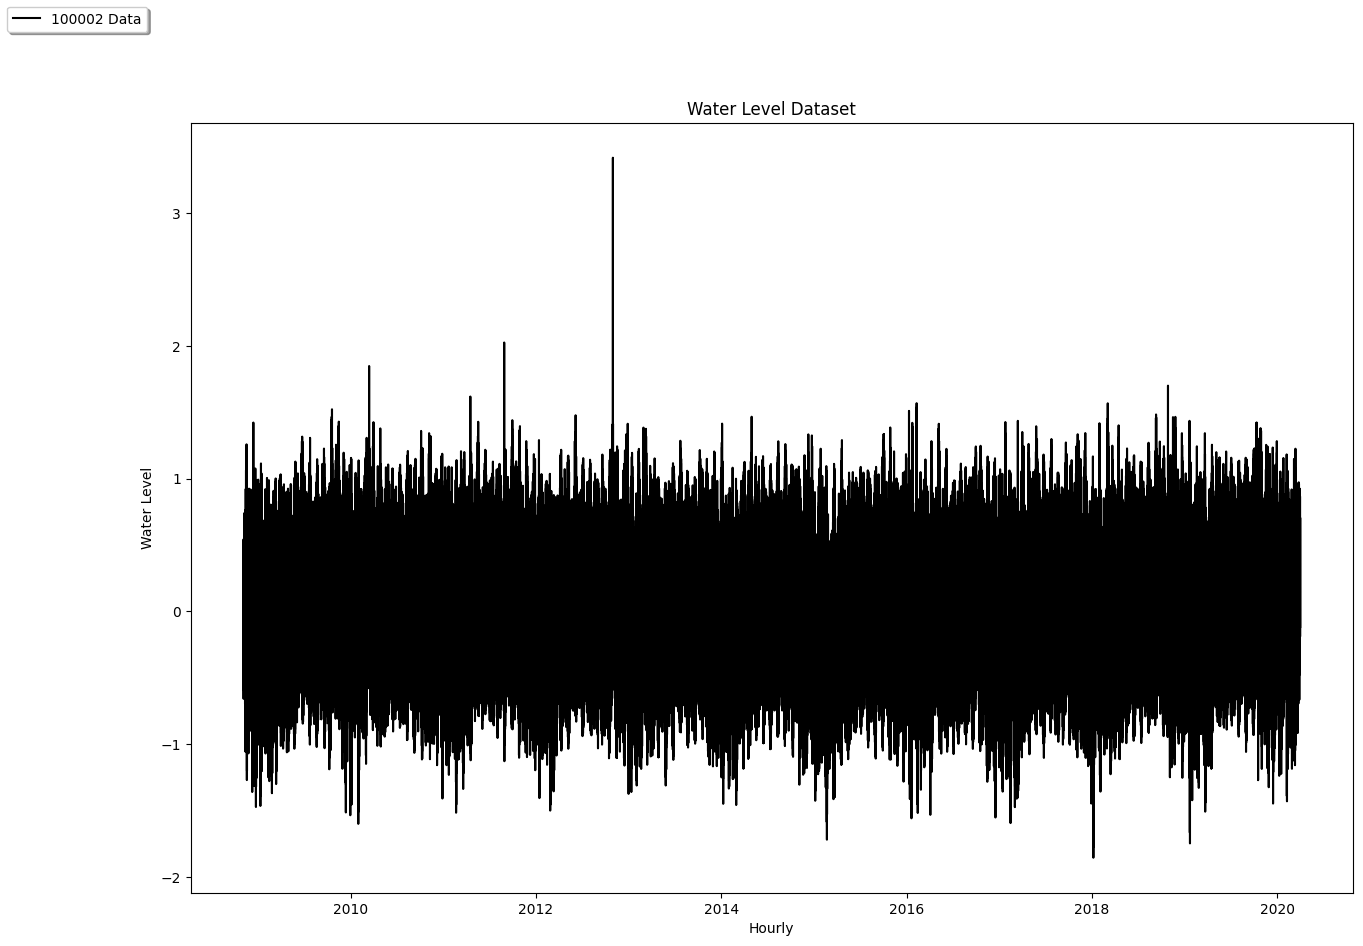

In [7]:
pot_detector.plot(ptype="line-dataset-ts", title="Water Level Dataset", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

In [8]:
#Reset time windows
pot_detector.reset_time_window(
    analysis_type="historical",
    t0_pct=0.65,
    t1_pct=0.25,
    t2_pct=0.1
)

In [9]:
print("T0:", pot_detector.t0)
print("T1:", pot_detector.t1)
print("T2:", pot_detector.t2)

T0: 65001
T1: 25001
T2: 10000


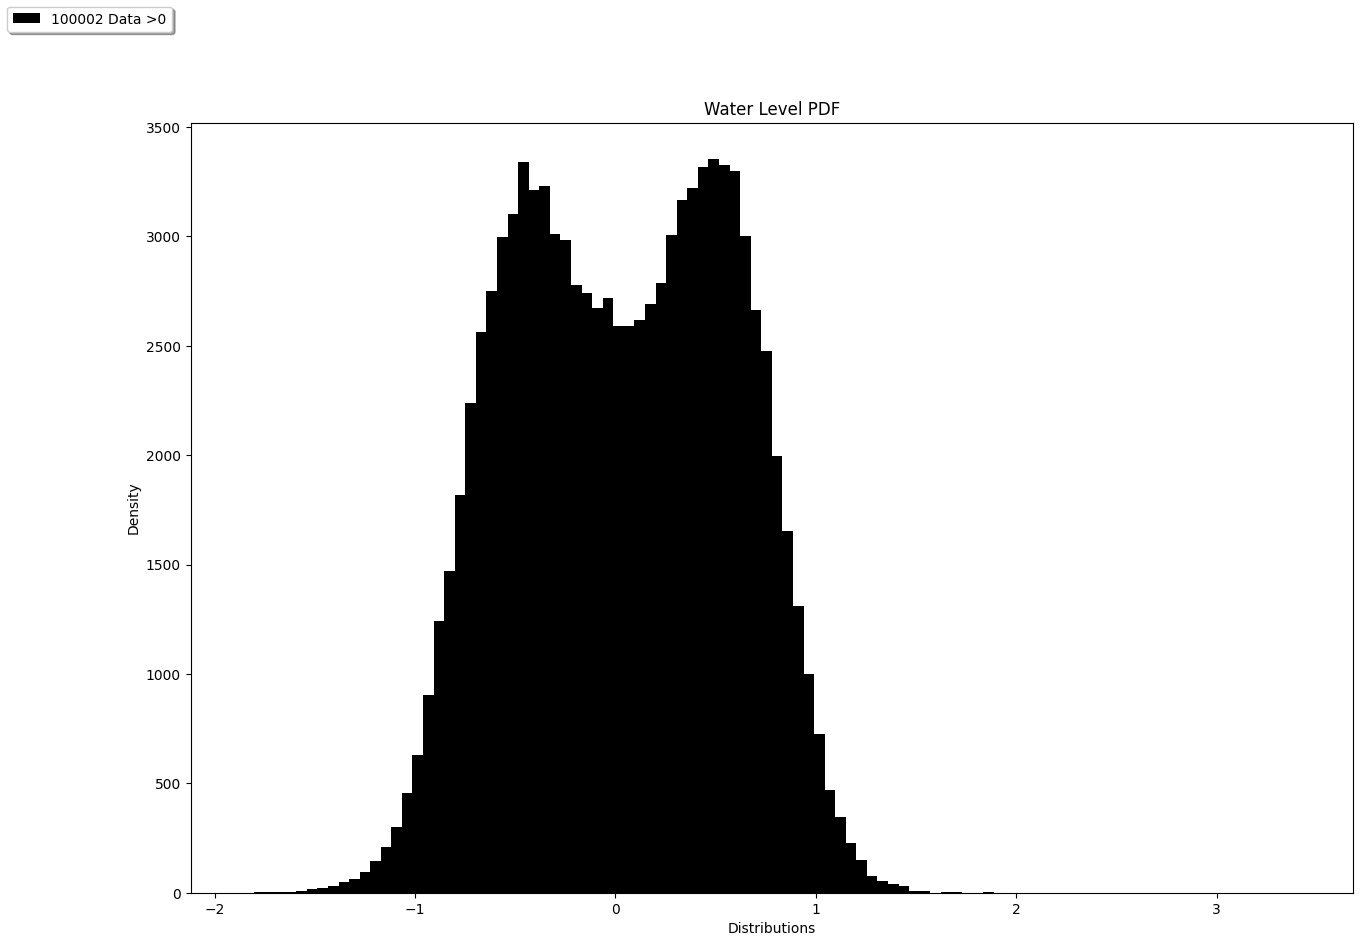

In [10]:
pot_detector.plot(ptype="hist-dataset-ts", title="Water Level PDF", xlabel="Distributions", ylabel="Density", alpha=1.0, bins=100)

# **The Peaks Over Threshold**

In [11]:
pot_detector.get_extremes(q=0.95)
pot_detector.exceedance_thresholds.head(20)

2008-11-03 06:00:00    0.859
2008-11-03 07:00:00    0.859
2008-11-03 08:00:00    0.859
2008-11-03 09:00:00    0.859
2008-11-03 10:00:00    0.859
2008-11-03 11:00:00    0.859
2008-11-03 12:00:00    0.859
2008-11-03 13:00:00    0.859
2008-11-03 14:00:00    0.859
2008-11-03 15:00:00    0.859
2008-11-03 16:00:00    0.859
2008-11-03 17:00:00    0.859
2008-11-03 18:00:00    0.859
2008-11-03 19:00:00    0.859
2008-11-03 20:00:00    0.859
2008-11-03 21:00:00    0.859
2008-11-03 22:00:00    0.859
2008-11-03 23:00:00    0.859
2008-11-04 00:00:00    0.859
2008-11-04 01:00:00    0.859
Name: Water Level, dtype: float64

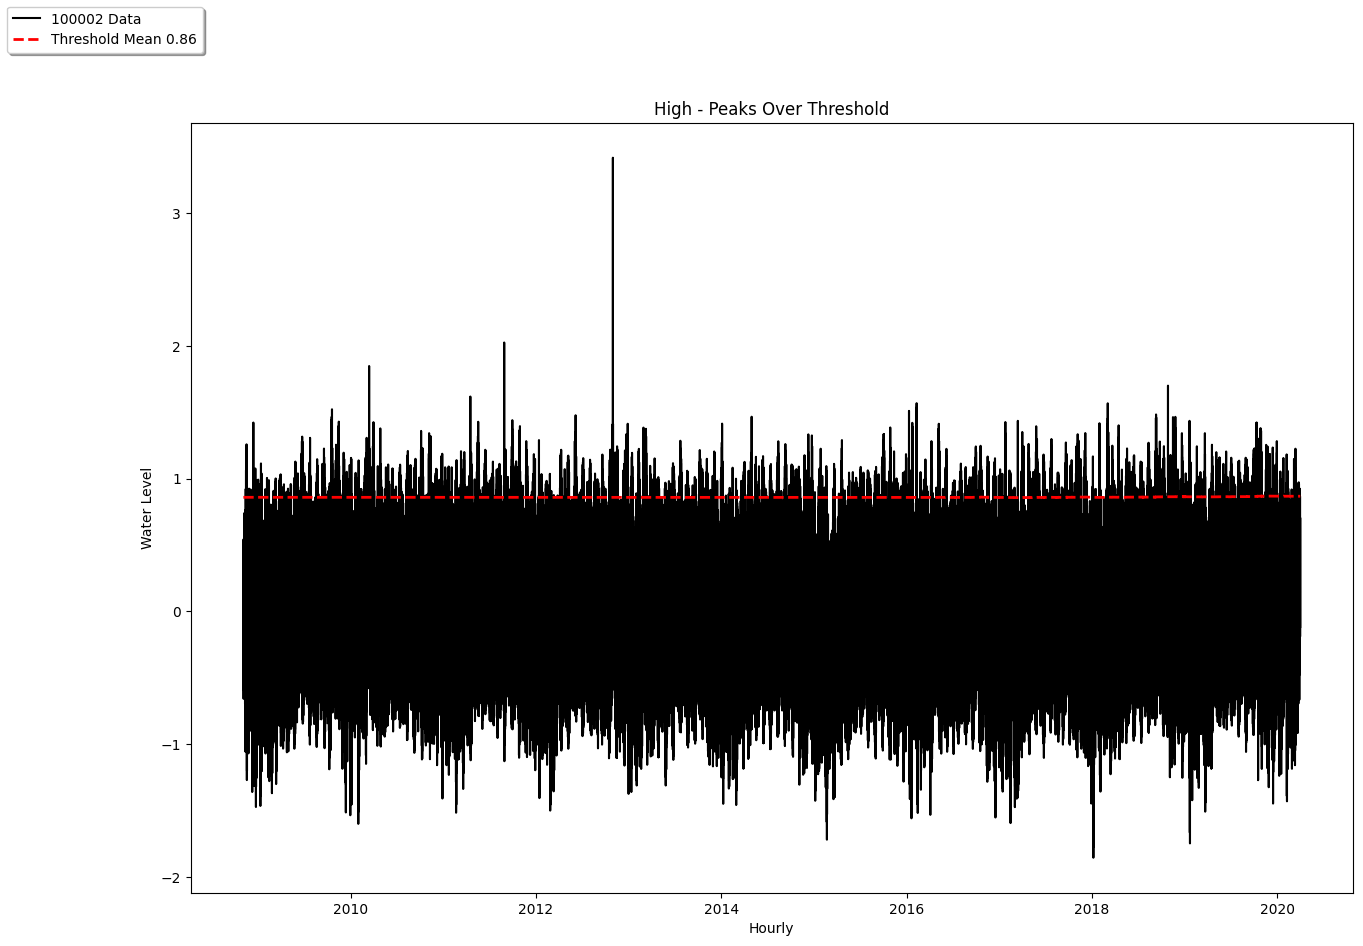

In [12]:
pot_detector.plot(ptype="line-exceedance-ts", title="High - Peaks Over Threshold", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

# **The Anomaly Score**

The anomaly score is the inverted value which is calculated as follow:

$\text{inverted p-value}=1 / (1-CDF(data, c, loc, scale))$

The idea of the inversion is to give the intuition of how big the score is. 

In [13]:
pot_detector.fit()
pot_detector.fit_result.tail(20)

2020-03-31 04:00:00    0.0
2020-03-31 05:00:00    0.0
2020-03-31 06:00:00    0.0
2020-03-31 07:00:00    0.0
2020-03-31 08:00:00    0.0
2020-03-31 09:00:00    0.0
2020-03-31 10:00:00    0.0
2020-03-31 11:00:00    0.0
2020-03-31 12:00:00    0.0
2020-03-31 13:00:00    0.0
2020-03-31 14:00:00    0.0
2020-03-31 15:00:00    0.0
2020-03-31 16:00:00    0.0
2020-03-31 17:00:00    0.0
2020-03-31 18:00:00    0.0
2020-03-31 19:00:00    0.0
2020-03-31 20:00:00    0.0
2020-03-31 21:00:00    0.0
2020-03-31 22:00:00    0.0
2020-03-31 23:00:00    0.0
Name: anomaly scores, dtype: float64

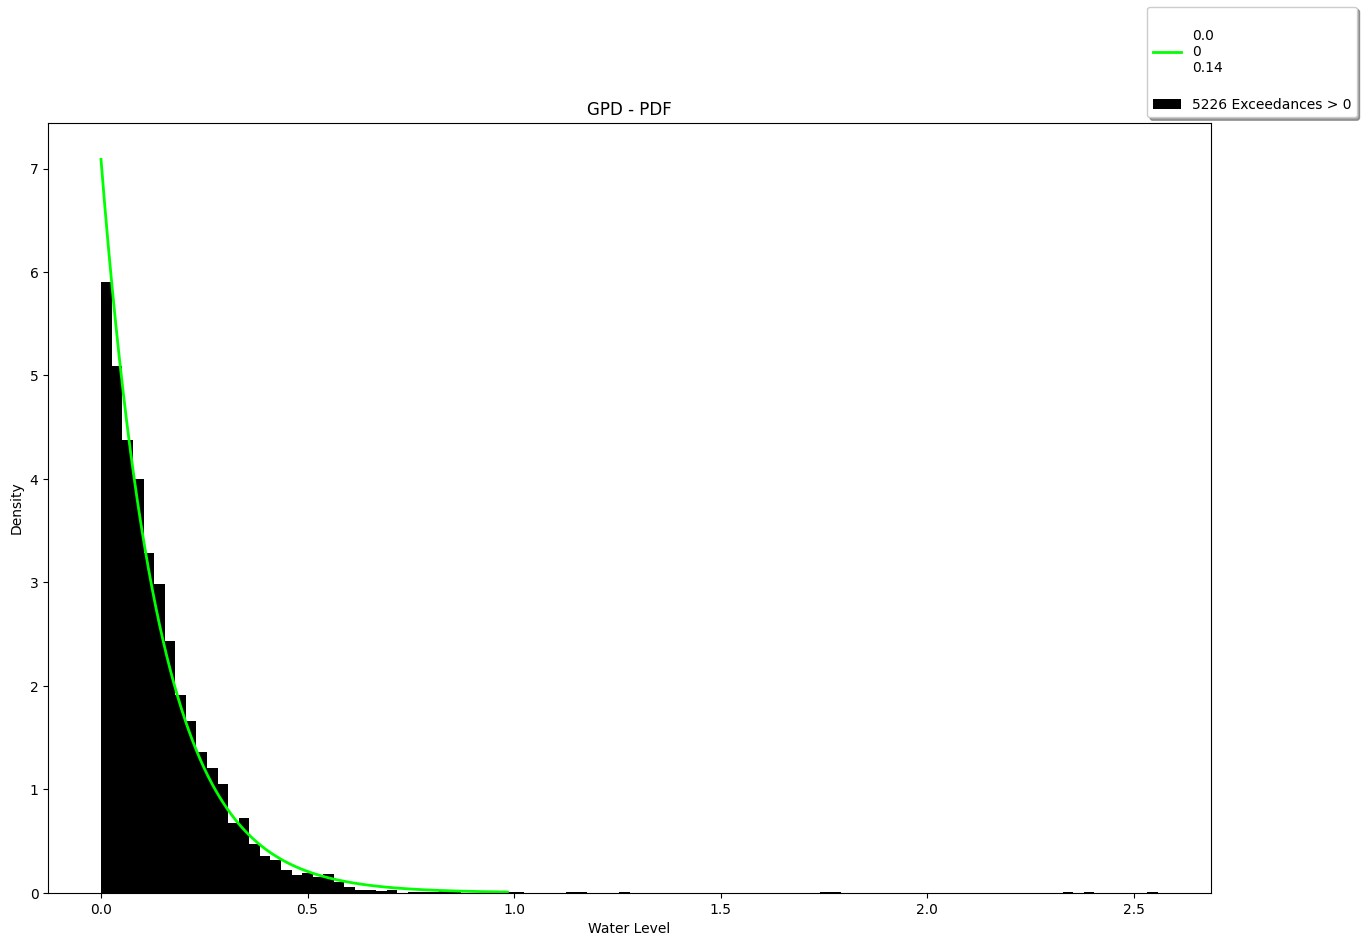

In [14]:
pot_detector.plot(ptype="hist-gpd-ts", title="GPD - PDF", xlabel="Water Level", ylabel="Density", alpha=1.0, bins=100)

In [15]:
pot_detector.params

{0: {'index': Timestamp('2016-04-03 15:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 1: {'index': Timestamp('2016-04-03 16:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 2: {'index': Timestamp('2016-04-03 17:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 3: {'index': Timestamp('2016-04-03 18:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 4: {'index': Timestamp('2016-04-03 19:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 5: {'index': Timestamp('2016-04-03 20:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 6: {'index': Timestamp('2016-04-03 21:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 7: {'index': Timestamp('2016-04-03 22:00:00'),
  'c': 0.0,
  'loc': 

In [16]:
pot_detector.fit_result

2016-04-03 15:00:00    0.0
2016-04-03 16:00:00    0.0
2016-04-03 17:00:00    0.0
2016-04-03 18:00:00    0.0
2016-04-03 19:00:00    0.0
                      ... 
2020-03-31 19:00:00    0.0
2020-03-31 20:00:00    0.0
2020-03-31 21:00:00    0.0
2020-03-31 22:00:00    0.0
2020-03-31 23:00:00    0.0
Name: anomaly scores, Length: 35001, dtype: float64

# **The Detection**

This is probably the easiest to implement! But nevertheless, it needed creativity to think about a dynamic way to choose for the threshold. Hence I chose to utilise the quantile method again from `numpy.quantile`. The threshold is calculated only from the `t1` time window.

In [17]:
pot_detector.detect(0.95)
pot_detector.detection_result.tail(10)

2020-03-31 14:00:00    False
2020-03-31 15:00:00    False
2020-03-31 16:00:00    False
2020-03-31 17:00:00    False
2020-03-31 18:00:00    False
2020-03-31 19:00:00    False
2020-03-31 20:00:00    False
2020-03-31 21:00:00    False
2020-03-31 22:00:00    False
2020-03-31 23:00:00    False
Name: detected data, dtype: bool

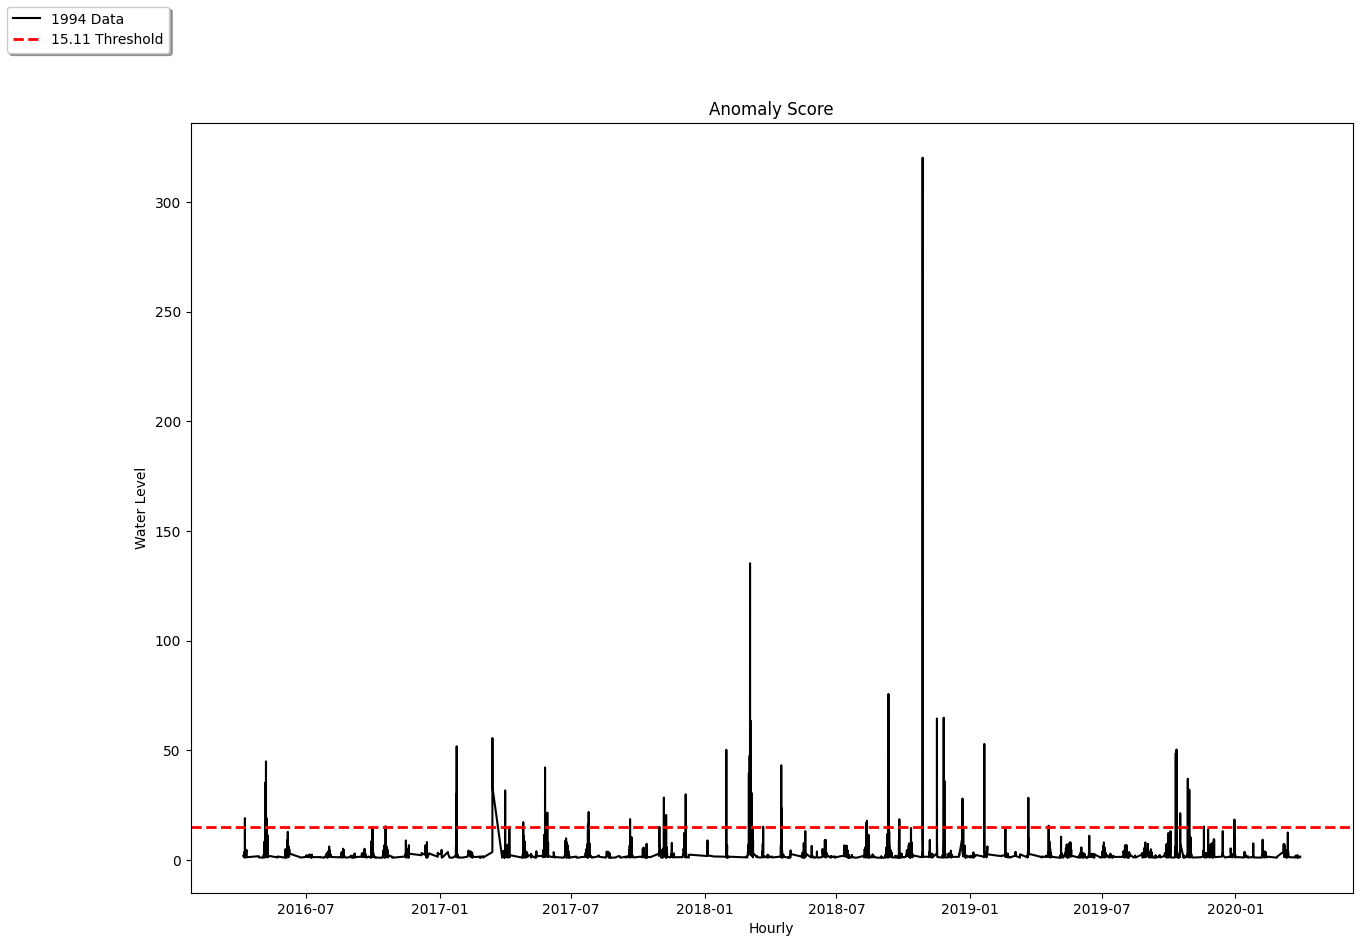

In [18]:
pot_detector.plot(ptype="line-anomaly-score-ts", title="Anomaly Score", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

In [19]:
pot_detector.detection_summary

,row,anomalous_data,anomaly_score,anomaly_threshold
2019-03-22 02:00:00,90980,1.342,28.333367,15.110118
2019-04-19 01:00:00,91651,1.255,15.603072,15.110118
2019-10-10 22:00:00,95848,1.319,24.615872,15.110118
2019-10-10 23:00:00,95849,1.417,48.738588,15.110118
2019-10-11 00:00:00,95850,1.391,40.553093,15.110118
2019-10-11 12:00:00,95862,1.315,23.783489,15.110118
2019-10-11 23:00:00,95873,1.320,24.591625,15.110118
2019-10-12 00:00:00,95874,1.423,50.330515,15.110118
2019-10-12 01:00:00,95875,1.359,32.152808,15.110118
2019-10-17 02:00:00,95996,1.301,21.303186,15.110118


# **The Evaluation**

For evaluating our result, I implemented "Kolmogorov Smirnov" test and the QQ plot for the visual observation. Both tests are dedicated to get an idea of how accurate or not the fitting result: the parameters.

### **Kolmogorov-Smirnov**

The KS test is a statistical method used to determine if a sample comes from a specific distribution.

In [20]:
pot_detector.evaluate(method="ks")
pot_detector.evaluation_result

,total_nonzero_exceedances,stats_distance,p_value,c,loc,scale
0,100002,0.035224,0.000005,0.003022,0,0.140923


When using the KS test, we want to focus on the `stats_distance` that measures the maximum distance between the empirical distribution function of the sample and the cumulative distribution function of the reference (theoretical) distribution.

In simpler terms, it quantifies the largest discrepancy between the distribution of your sample data and the expected theoretical distribution. A larger stats_distance value indicates a greater difference between the two distributions, suggesting that the sample may not follow the theoretical distribution closely.

### **QQ Plot**

A QQ (quantile-quantile) plot is a graphical tool used to compare two probability distributions by plotting their quantiles against each other. If the two distributions being compared are similar, the points in the QQ plot will approximately lie on a straight line.

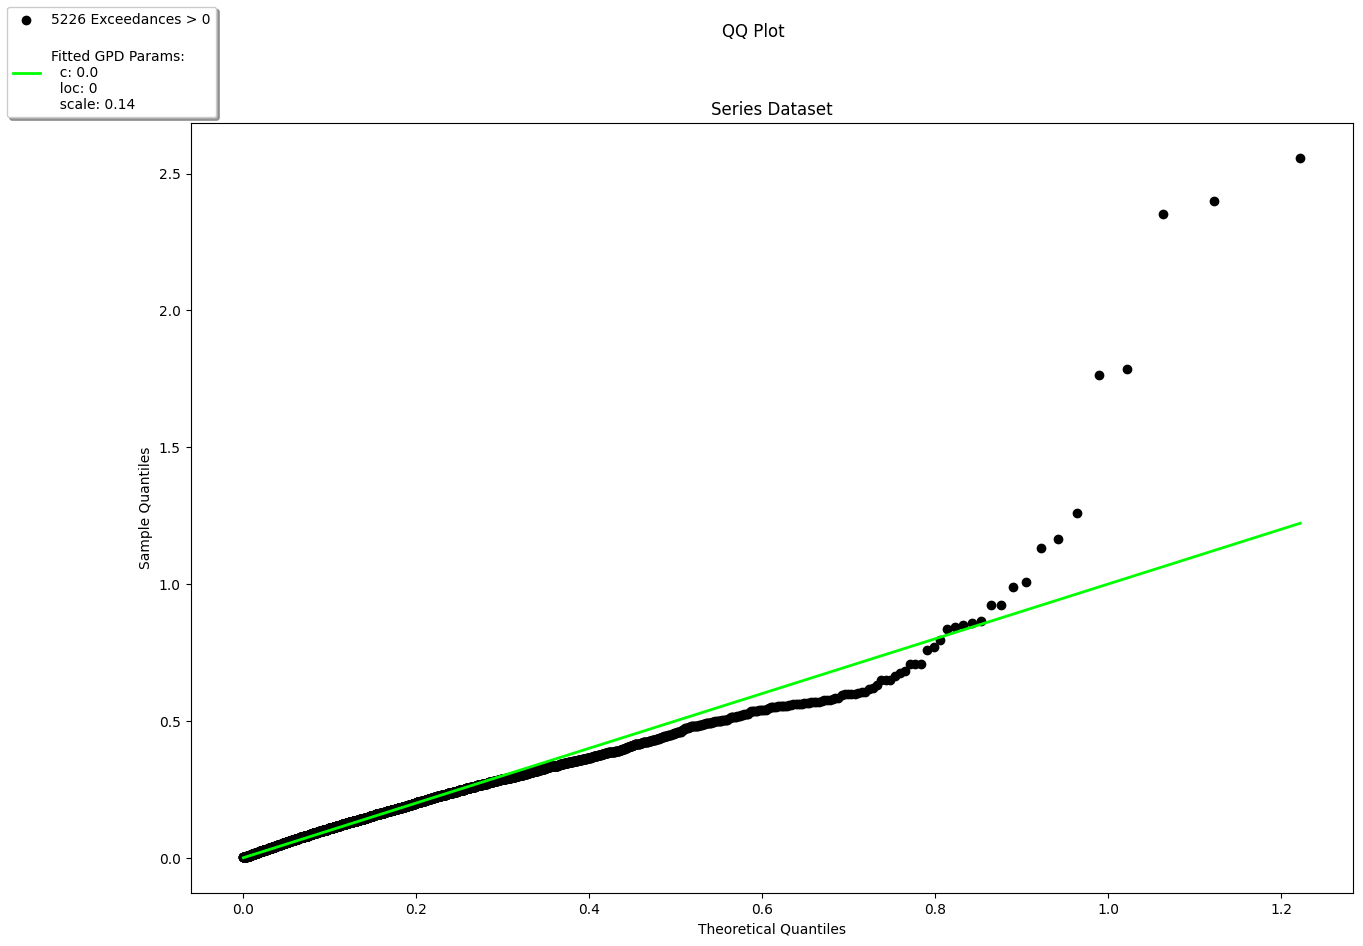

In [21]:
pot_detector.evaluate(method="qq")

#### **This QQ Plot can be observed as:**

The plot shows that for the majority of data points (in the middle portion of the dataset), the sample quantiles align well with the theoretical GPD quantiles, as indicated by the points following closely along the green line.

However, towards the tails, especially the upper tail, there is a clear deviation with the sample quantiles being larger than the theoretical ones, suggesting that the distribution of your data has heavier tails than the fitted GPD. This may imply that extreme values in your dataset are more likely or more extreme than what the GPD would predict.

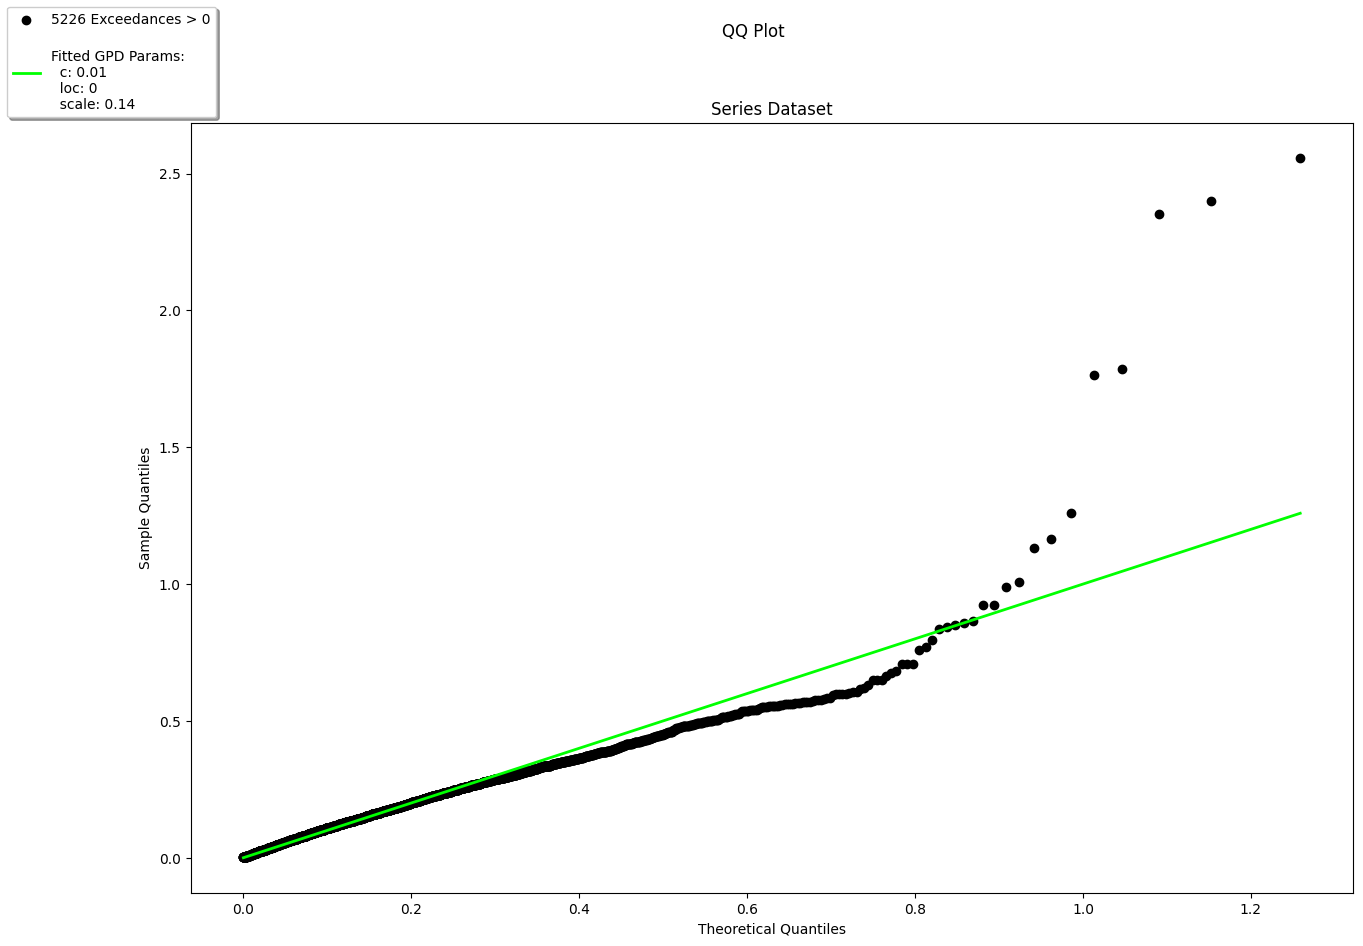

In [22]:
pot_detector.evaluate(method="qq", is_random_param=True)

<h1 align=center><strong>Extremely Low Anomaly Detection</strong></h1>

We will use the same dataset, but now we will look into finding the extremely "low" anomalies.

In [23]:
pot_detector = atics.get_detector(
    method="POT",
    dataset=ts,
    anomaly_type="low"
)

#Reset time windows
pot_detector.reset_time_window(
    analysis_type="historical",
    t0_pct=0.65,
    t1_pct=0.25,
    t2_pct=0.1
)

In [24]:
print("T0:", pot_detector.t0)
print("T1:", pot_detector.t1)
print("T2:", pot_detector.t2)

T0: 65001
T1: 25001
T2: 10000


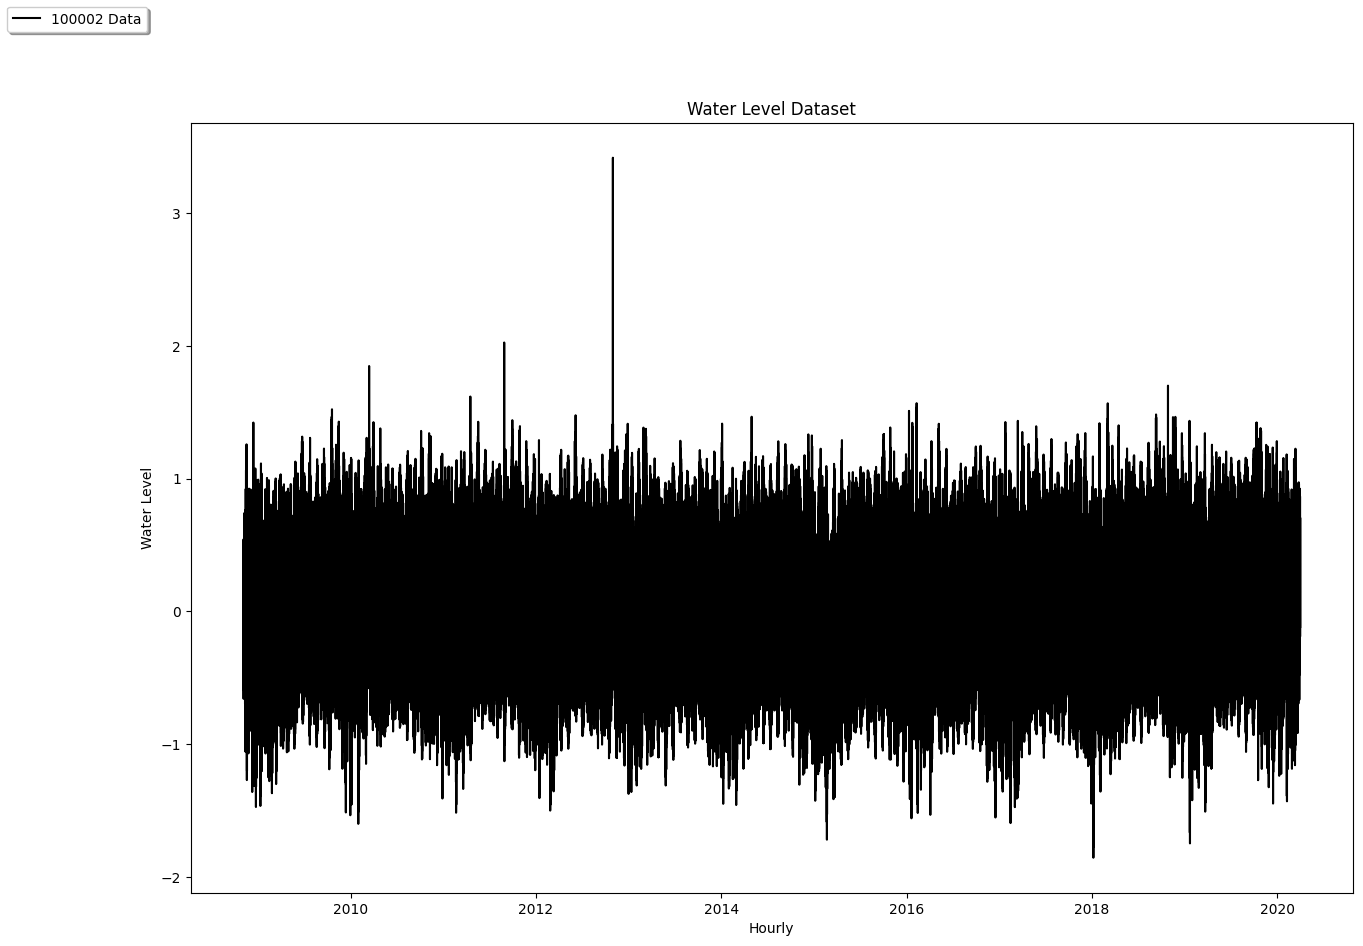

In [25]:
pot_detector.plot(ptype="line-dataset-ts", title="Water Level Dataset", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

In [26]:
pot_detector.get_extremes(q=0.95)
pot_detector.exceedance_thresholds.head(20)

2008-11-03 06:00:00   -0.822
2008-11-03 07:00:00   -0.822
2008-11-03 08:00:00   -0.822
2008-11-03 09:00:00   -0.822
2008-11-03 10:00:00   -0.822
2008-11-03 11:00:00   -0.822
2008-11-03 12:00:00   -0.822
2008-11-03 13:00:00   -0.822
2008-11-03 14:00:00   -0.822
2008-11-03 15:00:00   -0.822
2008-11-03 16:00:00   -0.822
2008-11-03 17:00:00   -0.822
2008-11-03 18:00:00   -0.822
2008-11-03 19:00:00   -0.822
2008-11-03 20:00:00   -0.822
2008-11-03 21:00:00   -0.822
2008-11-03 22:00:00   -0.822
2008-11-03 23:00:00   -0.822
2008-11-04 00:00:00   -0.822
2008-11-04 01:00:00   -0.822
Name: Water Level, dtype: float64

In [27]:
pot_detector.exceedances.head()

2008-11-03 06:00:00    0.0
2008-11-03 07:00:00    0.0
2008-11-03 08:00:00    0.0
2008-11-03 09:00:00    0.0
2008-11-03 10:00:00    0.0
Name: exceedances, dtype: float64

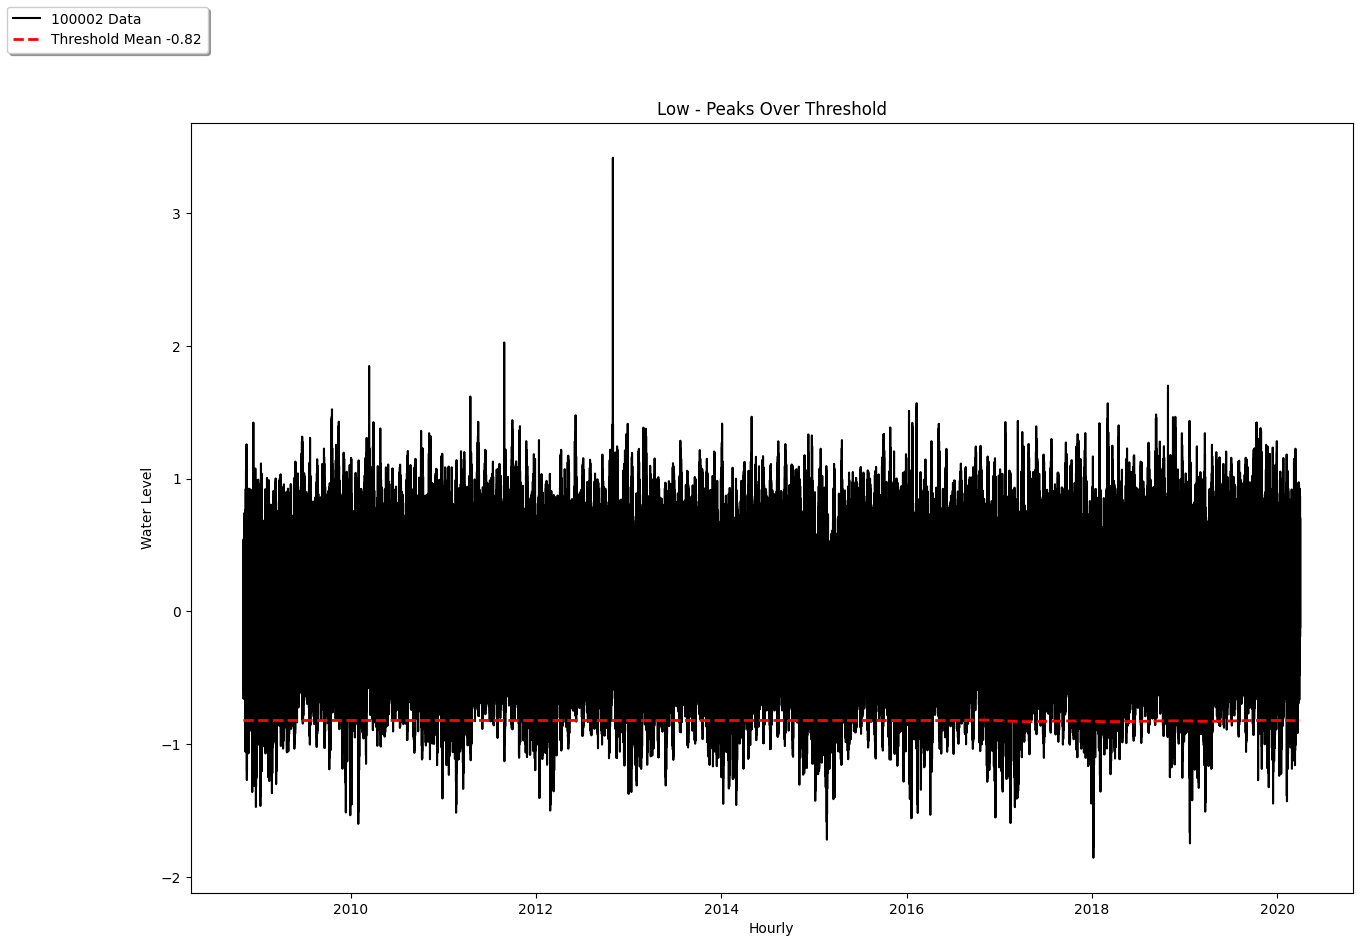

In [28]:
pot_detector.plot(ptype="line-exceedance-ts", title=f"Low - Peaks Over Threshold", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

In [29]:
pot_detector.fit()
pot_detector.fit_result.head(20)

2016-04-03 15:00:00    426.896585
2016-04-03 16:00:00    288.506586
2016-04-03 17:00:00     14.988961
2016-04-03 18:00:00      0.000000
2016-04-03 19:00:00      0.000000
2016-04-03 20:00:00      0.000000
2016-04-03 21:00:00      0.000000
2016-04-03 22:00:00      0.000000
2016-04-03 23:00:00      0.000000
2016-04-04 00:00:00      0.000000
2016-04-04 01:00:00      0.000000
2016-04-04 02:00:00      0.000000
2016-04-04 03:00:00      2.348131
2016-04-04 04:00:00      4.020712
2016-04-04 05:00:00      1.576950
2016-04-04 06:00:00      0.000000
2016-04-04 07:00:00      0.000000
2016-04-04 08:00:00      0.000000
2016-04-04 09:00:00      0.000000
2016-04-04 10:00:00      0.000000
Name: anomaly scores, dtype: float64

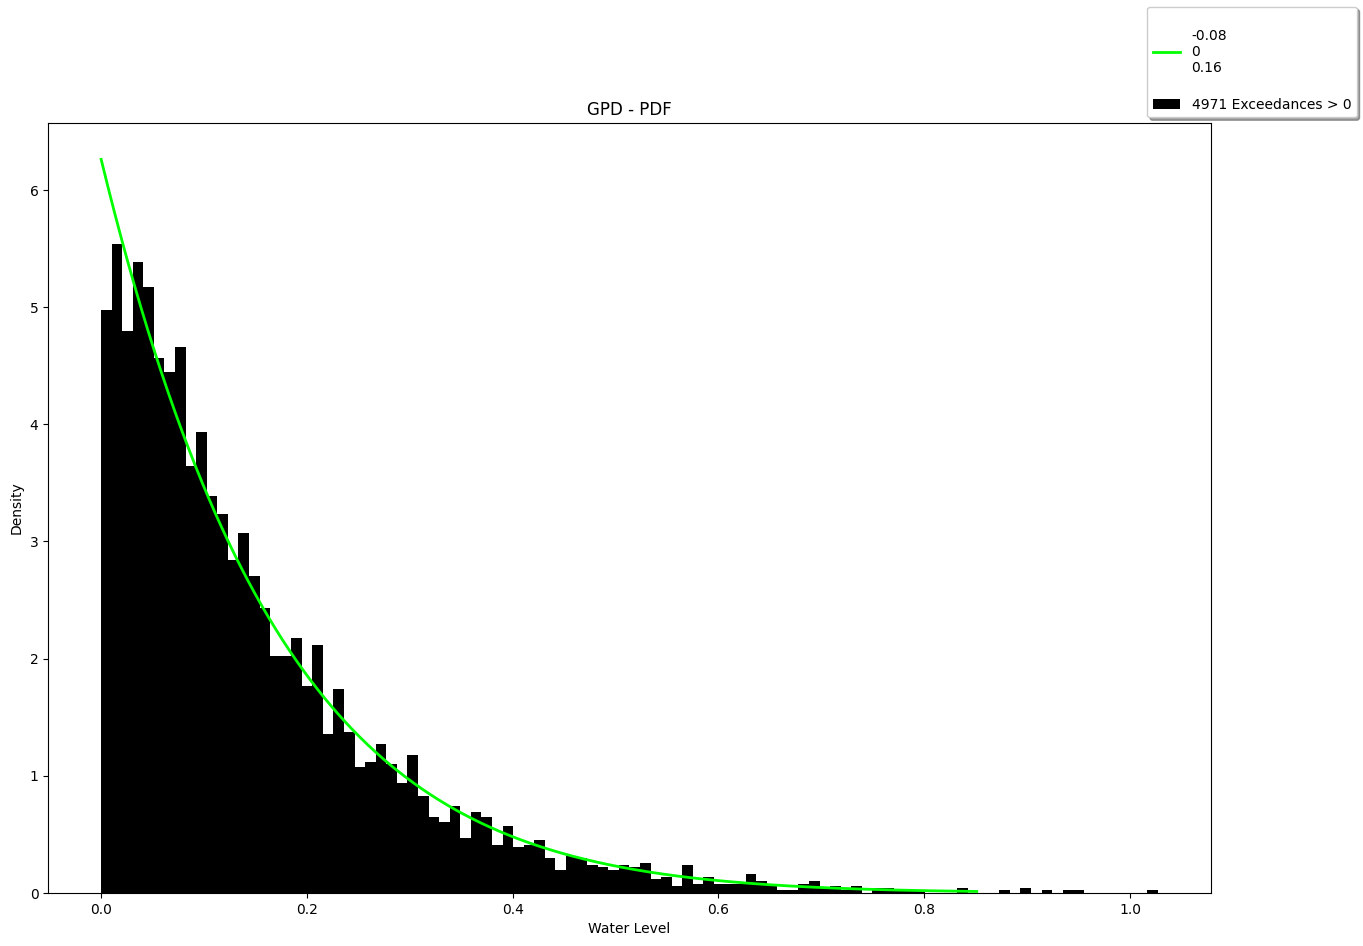

In [30]:
pot_detector.plot(ptype="hist-gpd-ts", title="GPD - PDF", xlabel="Water Level", ylabel="Density", alpha=1.0, bins=100)

In [31]:
pot_detector.params

{0: {'index': Timestamp('2016-04-03 15:00:00'),
  'c': -0.11319064073736665,
  'loc': 0,
  'scale': 0.16197829798443109,
  'p_value': 0.002342487702282285,
  'anomaly_score': 426.8965847827932},
 1: {'index': Timestamp('2016-04-03 16:00:00'),
  'c': -0.11155605069451108,
  'loc': 0,
  'scale': 0.16193877558240793,
  'p_value': 0.003466125381993358,
  'anomaly_score': 288.5065858249199},
 2: {'index': Timestamp('2016-04-03 17:00:00'),
  'c': -0.11026895933166633,
  'loc': 0,
  'scale': 0.16192526454841927,
  'p_value': 0.06671576432785159,
  'anomaly_score': 14.988961155954764},
 3: {'index': Timestamp('2016-04-03 18:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 4: {'index': Timestamp('2016-04-03 19:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 5: {'index': Timestamp('2016-04-03 20:00:00'),
  'c': 0.0,
  'loc': 0.0,
  'scale': 0.0,
  'p_value': 0.0,
  'anomaly_score': 0.0},
 6: {'index': Ti

In [32]:
pot_detector.detect(0.95)
pot_detector.detection_result.tail(20)

2020-03-31 04:00:00    False
2020-03-31 05:00:00    False
2020-03-31 06:00:00    False
2020-03-31 07:00:00    False
2020-03-31 08:00:00    False
2020-03-31 09:00:00    False
2020-03-31 10:00:00    False
2020-03-31 11:00:00    False
2020-03-31 12:00:00    False
2020-03-31 13:00:00    False
2020-03-31 14:00:00    False
2020-03-31 15:00:00    False
2020-03-31 16:00:00    False
2020-03-31 17:00:00    False
2020-03-31 18:00:00    False
2020-03-31 19:00:00    False
2020-03-31 20:00:00    False
2020-03-31 21:00:00    False
2020-03-31 22:00:00    False
2020-03-31 23:00:00    False
Name: detected data, dtype: bool

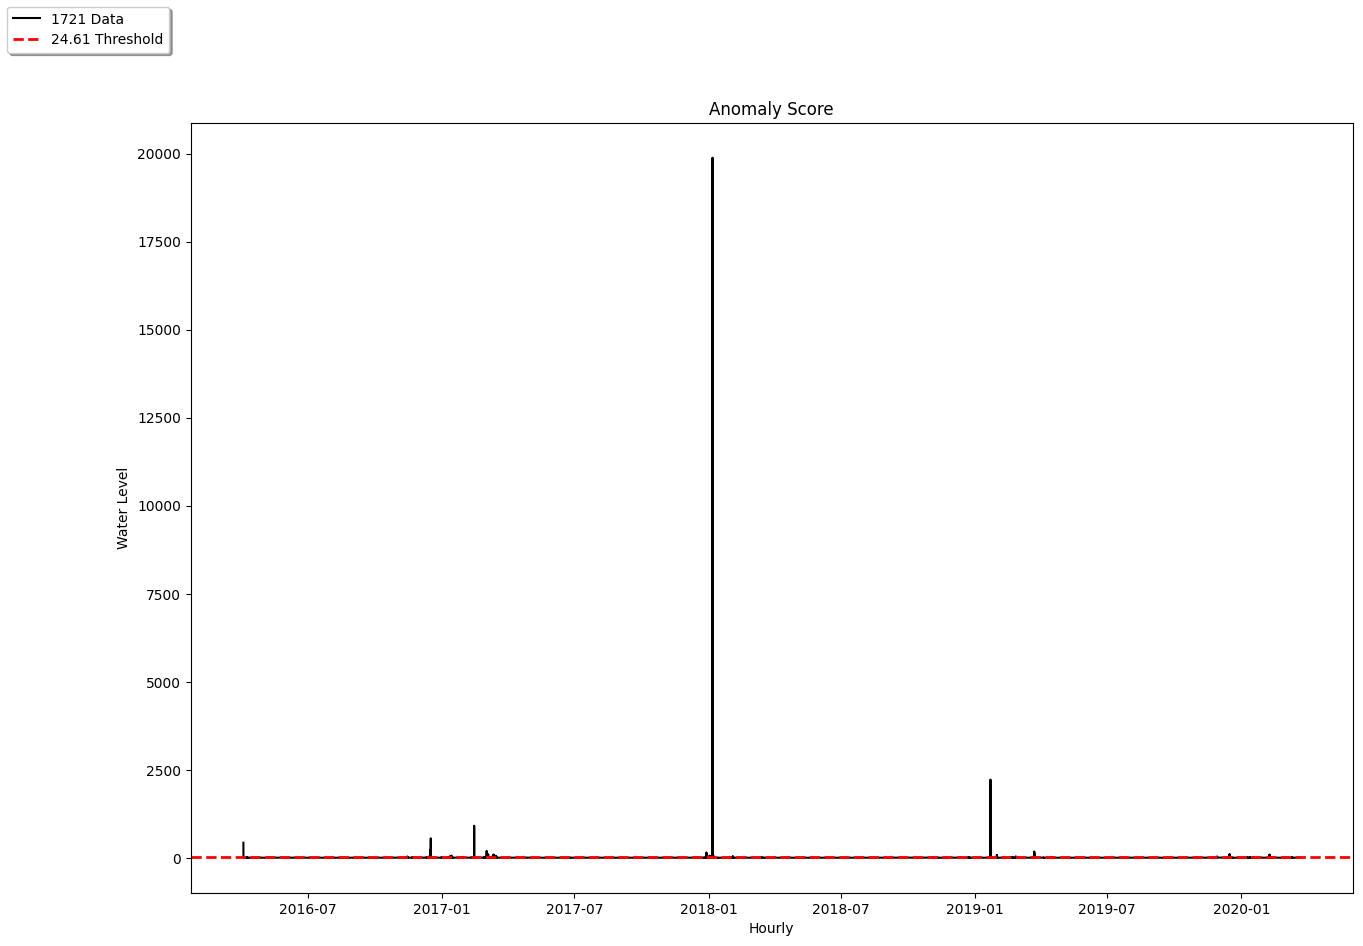

In [33]:
pot_detector.plot(ptype="line-anomaly-score-ts", title="Anomaly Score", xlabel="Hourly", ylabel="Water Level", alpha=1.0)

In [34]:
pot_detector.detected_anomalies

2019-02-26 00:00:00   -1.329
2019-02-26 01:00:00   -1.330
2019-02-26 13:00:00   -1.291
2019-03-23 09:00:00   -1.509
2019-03-23 10:00:00   -1.466
2019-03-23 21:00:00   -1.422
2019-03-23 22:00:00   -1.441
2019-11-28 21:00:00   -1.325
2019-12-15 22:00:00   -1.448
2019-12-15 23:00:00   -1.297
2020-02-08 06:00:00   -1.391
2020-02-08 07:00:00   -1.287
2020-02-08 18:00:00   -1.293
2020-02-08 19:00:00   -1.431
Name: Water Level, dtype: float64

In [35]:
pot_detector.detection_summary

,row,anomalous_data,anomaly_score,anomaly_threshold
2019-02-26 00:00:00,90402,-1.329,36.740646,24.606906
2019-02-26 01:00:00,90403,-1.330,36.965458,24.606906
2019-02-26 13:00:00,90415,-1.291,26.575442,24.606906
2019-03-23 09:00:00,91011,-1.509,177.240008,24.606906
2019-03-23 10:00:00,91012,-1.466,117.867263,24.606906
2019-03-23 21:00:00,91023,-1.422,78.898569,24.606906
2019-03-23 22:00:00,91024,-1.441,92.734315,24.606906
2019-11-28 21:00:00,97023,-1.325,37.258720,24.606906
2019-12-15 22:00:00,97432,-1.448,107.331247,24.606906
2019-12-15 23:00:00,97433,-1.297,29.555844,24.606906


In [36]:
pot_detector.evaluate(method="ks")
pot_detector.evaluation_result

,total_nonzero_exceedances,stats_distance,p_value,c,loc,scale
0,100002,0.020858,0.026092,-0.078355,0,0.159542


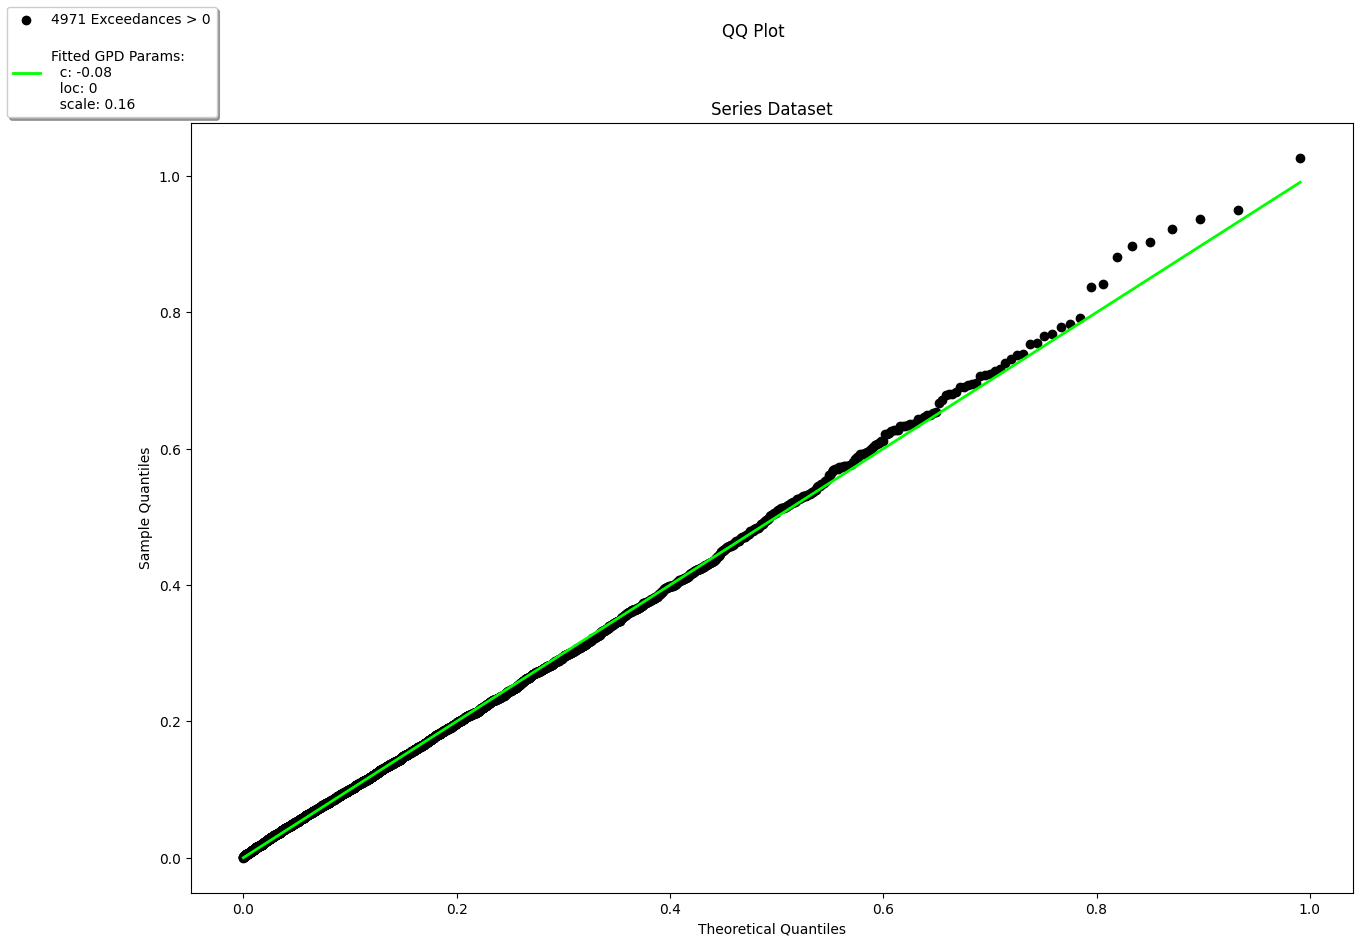

In [37]:
pot_detector.evaluate(method="qq")

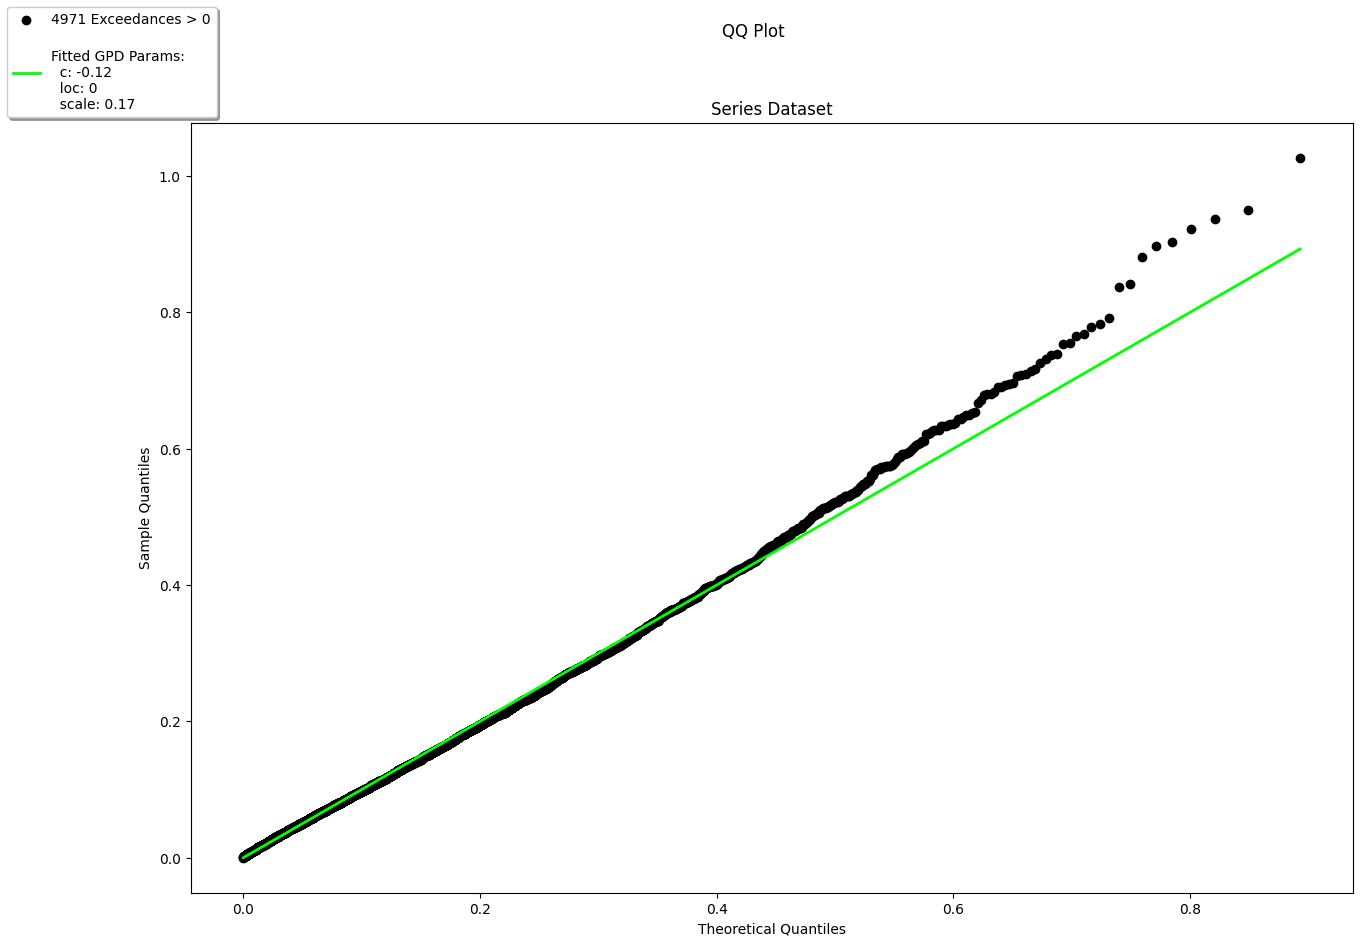

In [38]:
pot_detector.evaluate(method="qq", is_random_param=True)